In [5]:
!pip install -Uqq duckduckgo_search

In [6]:
from duckduckgo_search import ddg_images
from fastcore.all import *

In [7]:
def search_images(term, max_images=200): return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [8]:
urls = search_images('orchid flower', max_images=1)
urls[0]

'https://inspirationseek.com/wp-content/uploads/2015/01/Beautiful-Orchid-Flower.jpg'

In [ ]:
from fastdownload import download_url
dest = 'orchid.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

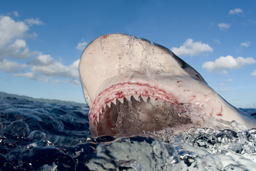

In [13]:
download_url(search_images('sharks', max_images=1)[0], 'shark.jpg', show_progress=False)
Image.open('shark.jpg').to_thumb(256,256)

In [ ]:
searches = 'orchid','shark'
path = Path('isorchid')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o}'))
    sleep(10)  # Pause between searches to avoid over-loading server
    resize_images(path/o, max_size=400, dest=path/o)

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

In [ ]:
is_orchid,_,probs = learn.predict(PILImage.create('orchid.jpg'))
print(f"This is a: {is_orchid}.")
print(f"Probability it's a orchid: {probs[0]:.4f}")